<a href="https://colab.research.google.com/github/beaamoo/Machine-Learning-Demonstration/blob/main/Random-forest-classifier-Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classifier Model with Iris Dataset

## Import Libraries

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## Load Dataset

In [2]:
data = load_iris()

print(data.data[:5])
print(data.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Class names appear like following:

In [3]:
print(data.target[:10])
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


## Visualize Dataset

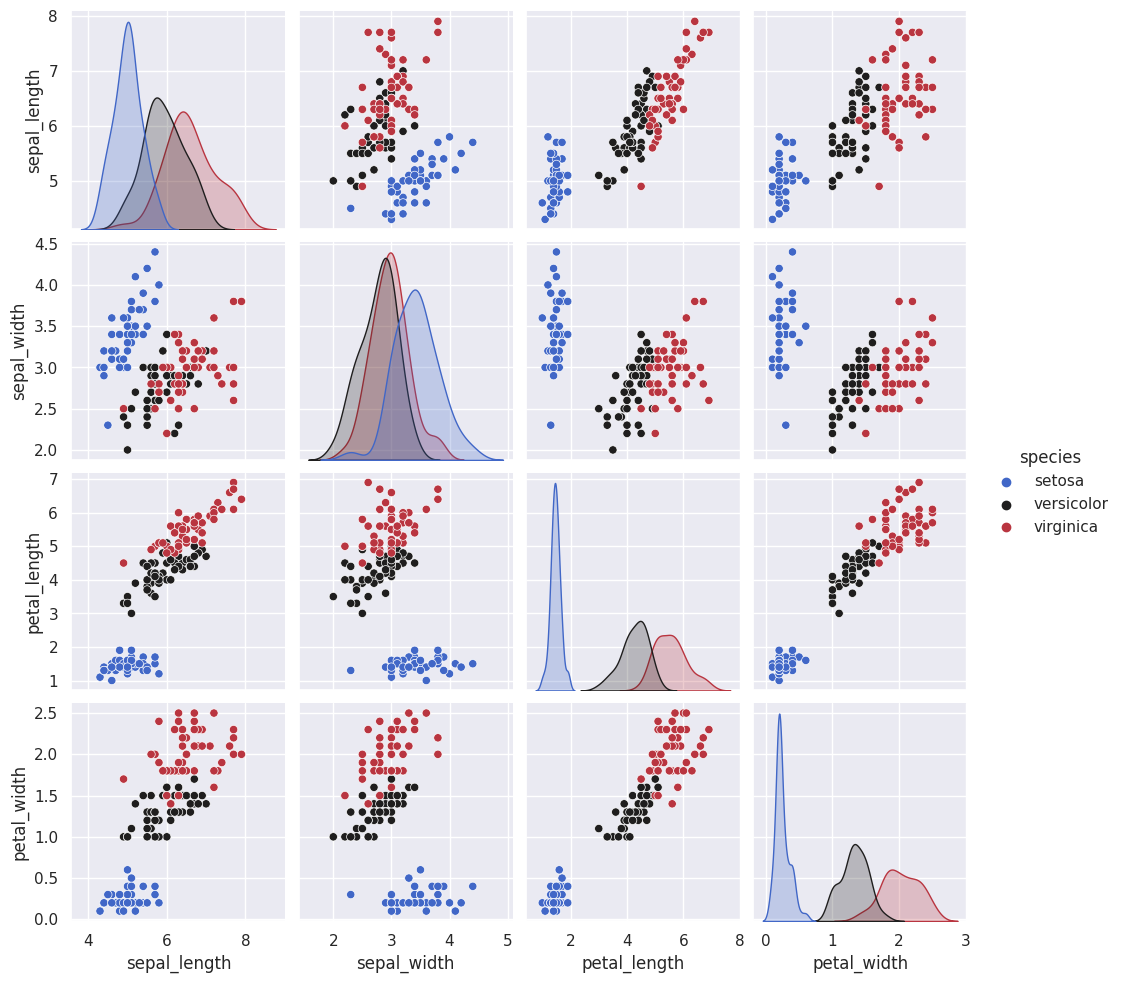

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", palette="icefire")
plt.show()

## Split Dataset

In [11]:
X_train, X_test, y_train, y_test= train_test_split(data.data, data.target, test_size=0.2)

## Build Random Forest Classifier Model

A plain vanilla random forest model with all the default settings will be created using the already imported RandomForestClassifier. Additionally, some of the most commonly adjusted parameters such as n_estimators, n_jobs, max_depth, and max_features can be defined at this stage. Further information on Random Forest parameters and optimization can be found in the scikit-learn documentation.

In [6]:
RF=RandomForestClassifier()

A Random Forest model with a few parameters defined could also created as following:

In [7]:
RF=RandomForestClassifier(n_estimators = 10, n_jobs = -1)

## Train Model

In [8]:
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

## Predict with Test Dataset

After the model has been trained, it can be used for prediction on the test partition of data without target values. The model's output (yhat) can then be compared with the target values (y_test) to evaluate its performance.

In [12]:
yhat=RF.predict(X_test)

print (yhat [0:5])
print (y_test [0:5])

[2 0 1 1 2]
[2 0 1 1 2]


## Random Forest Visualization

### Random Forest Dendrogram

An individual tree (estimator) can be extracted from a Random Forest in Python using the following code, where we are printing the 5th tree with index 4.

In [13]:
ind_tree = (RF.estimators_[4])
print(ind_tree)

DecisionTreeClassifier(max_features='sqrt', random_state=514373385)


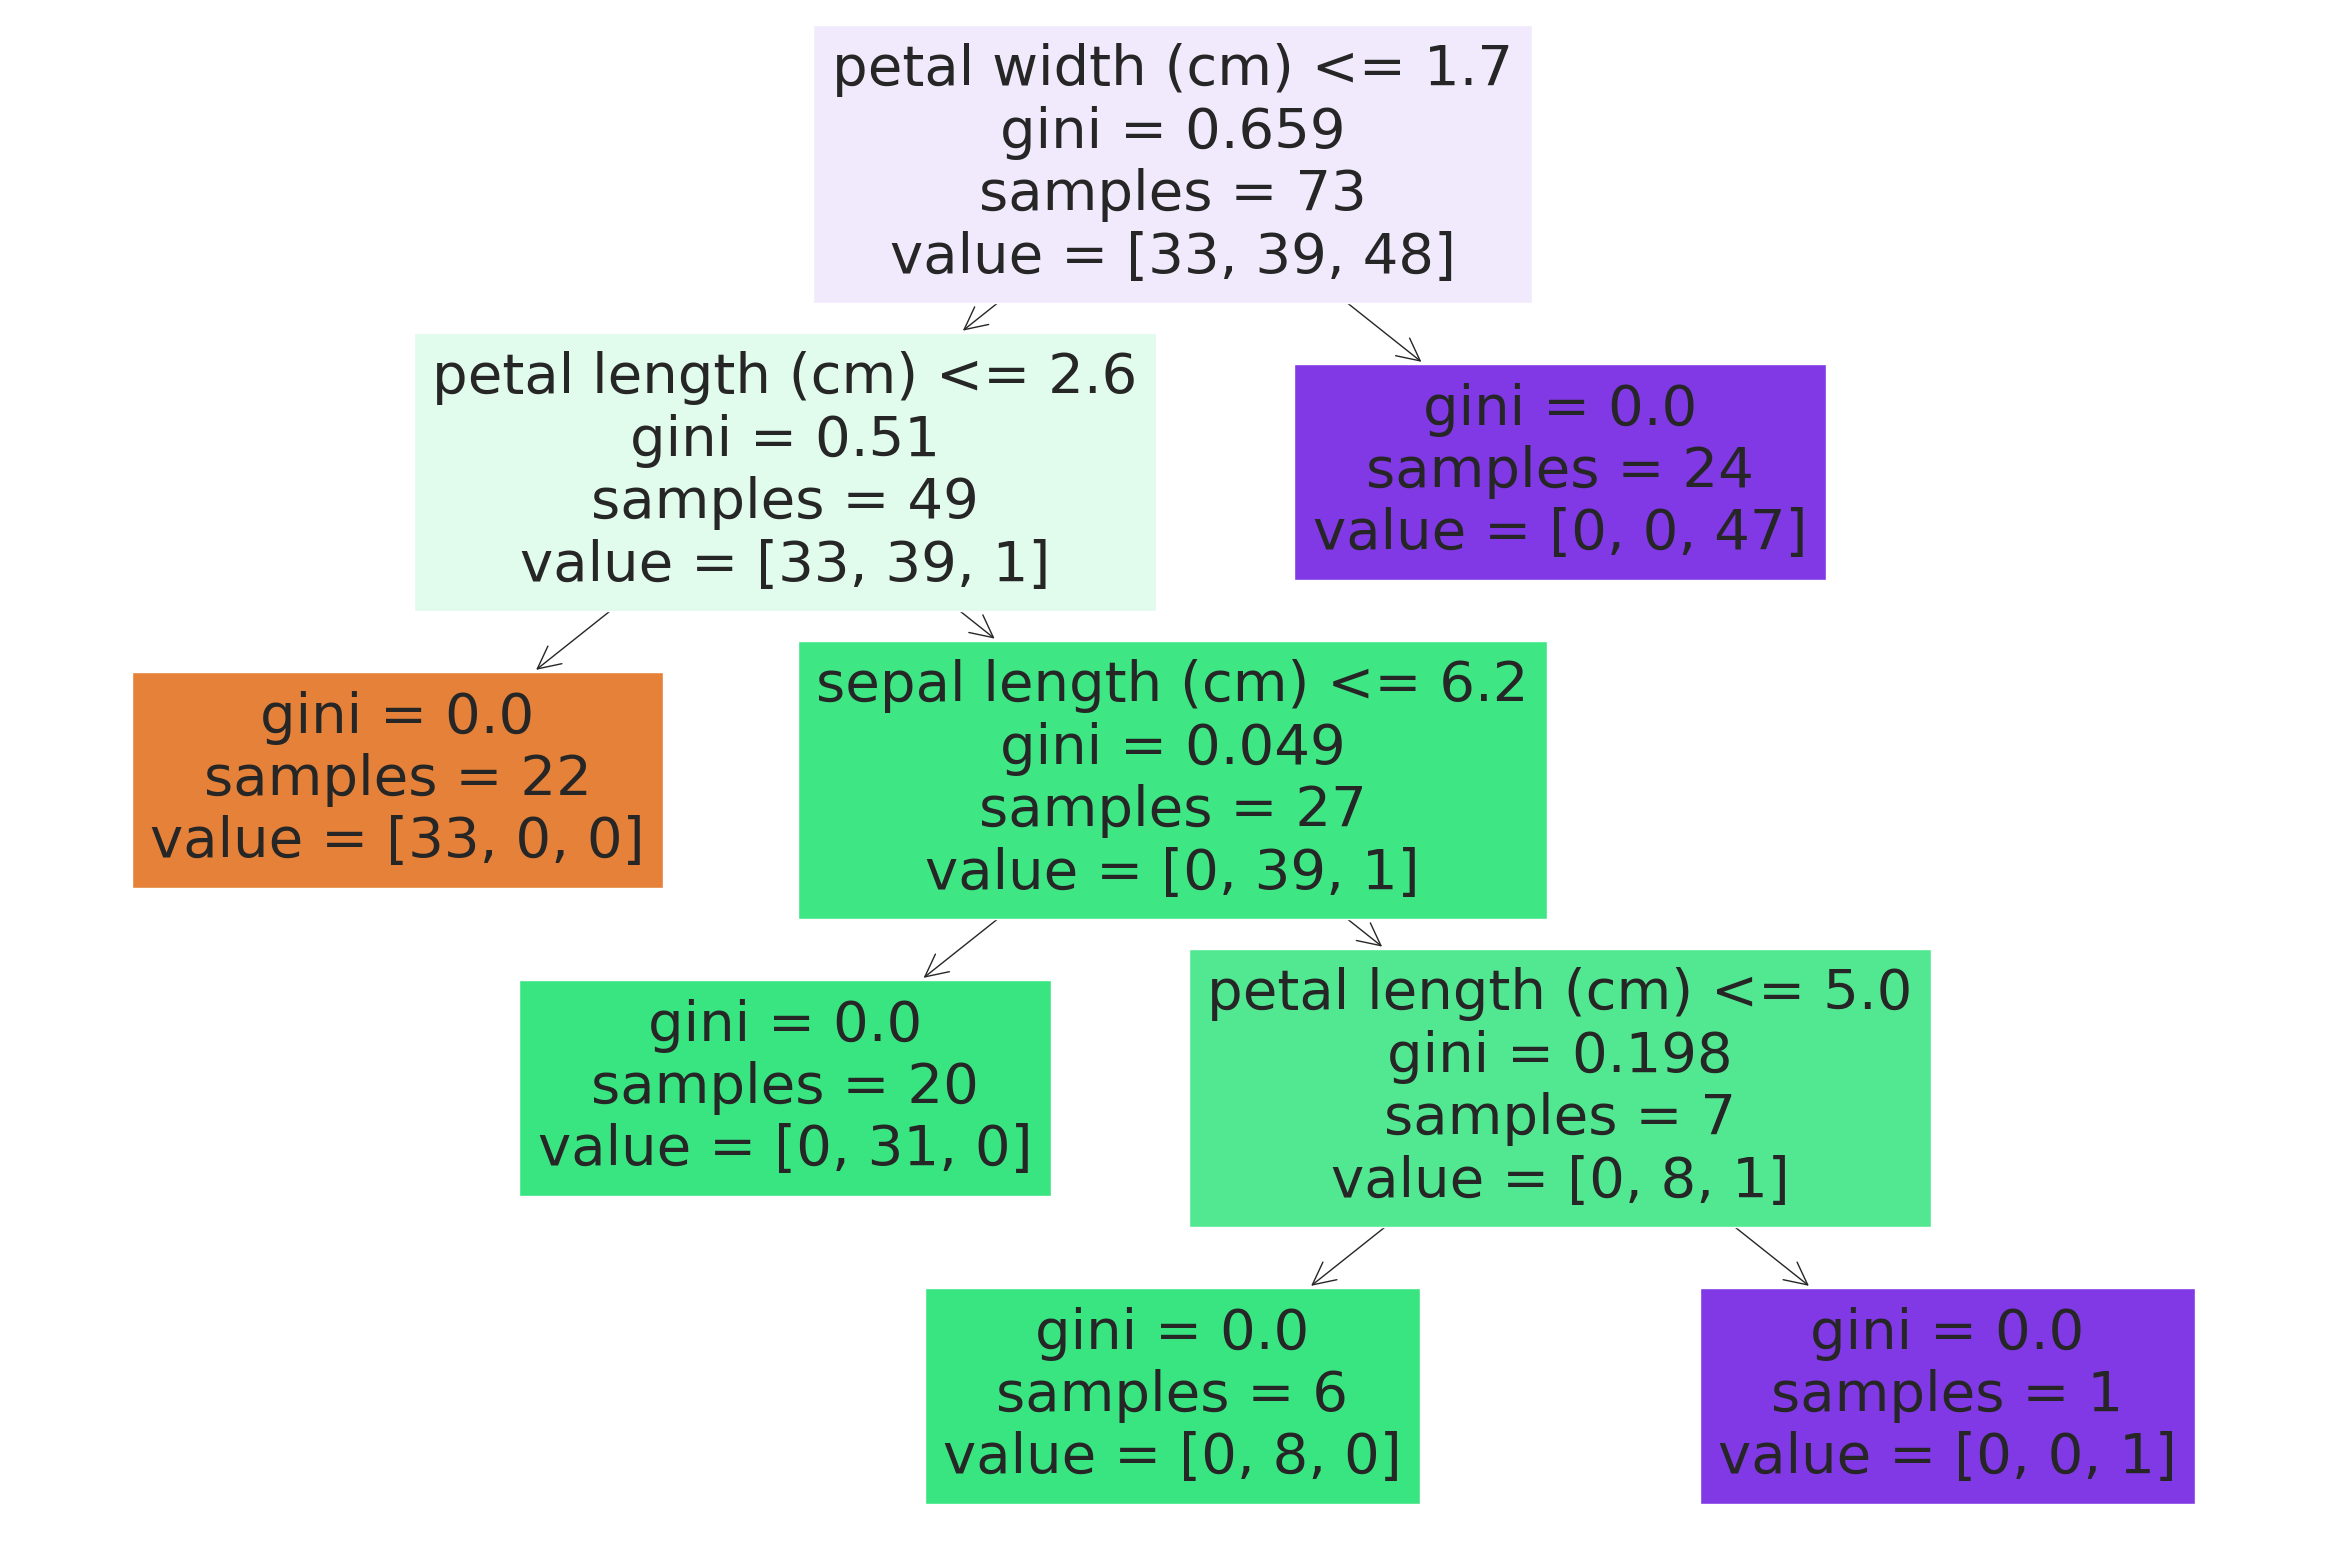

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(ind_tree, feature_names=data.feature_names, filled=True)

A 7 column plot can be created with each individual tree in the random forest taking up one column to visualize multiple trees at one time using a for loop and create a collage. The dpi parameter can also be increased for increasing the resolution in case the plot is saved and the image is zoomed in to investigate each tree more closely. Increasing the dpi will require more computation resources and space.

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (15,3), dpi=1800)

for i in range(0, 7):
    tree.plot_tree(RF.estimators_[i],
                   feature_names = data.feature_names,
                   class_names = data.target_names,
                   filled = True,
                   ax = axes[i])

### Confusion Matrix

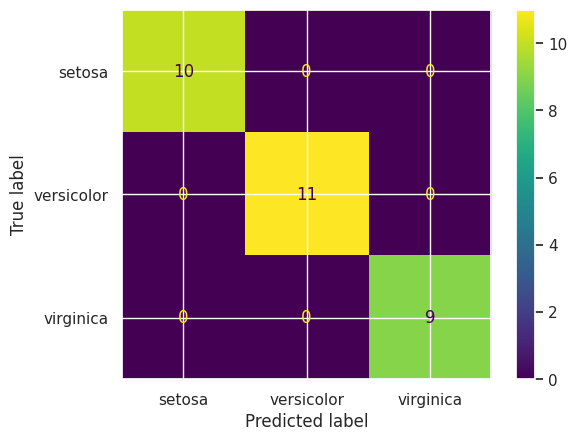

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test,display_labels=data.target_names) # cmap="bone"


It can be observed that one sample is being misclassified where a virginica iris is labeled as a versicolor iris. However, 29 other samples are being correctly classified. It should be noted that these 30 samples represent the test partition of the dataset, as a 20% train-test split was performed.

## Random Forest Model Evaluation


An example of evaluating the accuracy of decision trees using traditional statistical methods is shown below. It demonstrates the application of an accuracy score on the prediction results of our decision tree model on the iris dataset.

In [17]:
from sklearn import metrics
print("RF Accuracy is: ", metrics.accuracy_score(y_test, yhat))

RF Accuracy is:  1.0


The random forest model can be tuned based on the needs of the project. Some of the criteria to consider for tuning include accuracy, performance, training time, simplicity, computational efficiency, need for continuing training, and addressing data-specific needs such as bias, noise, and non-linearity.